# Valerio Velardo - The Sound of AI

<a href="https://avatars.githubusercontent.com/u/18124827?v=3" alt="koko"/></a>

How to get audio data ready for deep learning applications using Python and an audio analysis library called Librosa. 
1.  Fourier Transform to extract the power spectrum and the spectrogram. 
2. extract MFCCs and visualise all features.   

https://www.youtube.com/watch?v=Oa_d-zaUti8

https://github.com/musikalkemist/DeepLearningForAudioWithPython/blob/master/11-%20Preprocessing%20audio%20data%20for%20deep%20learning/code/audio_prep.py

In [25]:
import librosa, librosa.display
# in case of an error   run "pip install librosa " 

In [26]:
import numpy as np
import matplotlib.pyplot as plt 

In [27]:
FIG_SIZE = (15,10)
file = "blues.00000.wav"

In [28]:
 # load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

Text(0.5, 1.0, 'Waveform')

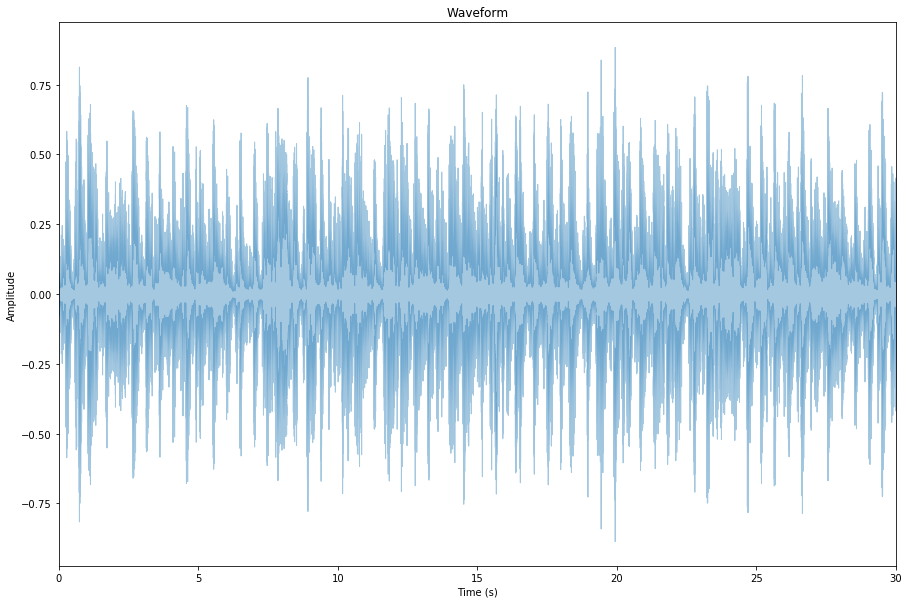

In [29]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform") 

In [30]:
 # FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

fft

array([-39.49905396-7.46069873e-14j, -18.64591868+3.67946888e-01j,
       -18.55041851+7.65147152e-02j, ..., -18.52902335+3.12934891e-02j,
       -18.55041851-7.65147152e-02j, -18.64591868-3.67946888e-01j])

In [31]:
# calculate abs values on complex numbers to get magnitude
a = np.abs(fft) 
a    

array([39.49905396, 18.64954874, 18.55057631, ..., 18.52904978,
       18.55057631, 18.64954874])

In [32]:
# create frequency variable
f = np.linspace(0, sample_rate, len(a)) 
f

array([0.00000000e+00, 3.33185754e-02, 6.66371509e-02, ...,
       2.20499334e+04, 2.20499667e+04, 2.20500000e+04])

Text(0.5, 1.0, 'Waveform')

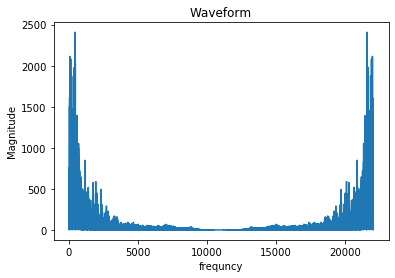

In [33]:
plt.plot(f,a) 
plt.xlabel("frequncy")
plt.ylabel("Magnitude")
plt.title("Waveform")    

In [34]:
#The result is  symatrical we don't need the  right side 

In [35]:
 # take half of the spectrum and frequency
left_spectrum  = a[:int(len(a)/2)]
left_frequency = f[:int(len(a)/2)]

Text(0.5, 1.0, 'Power spectrum')

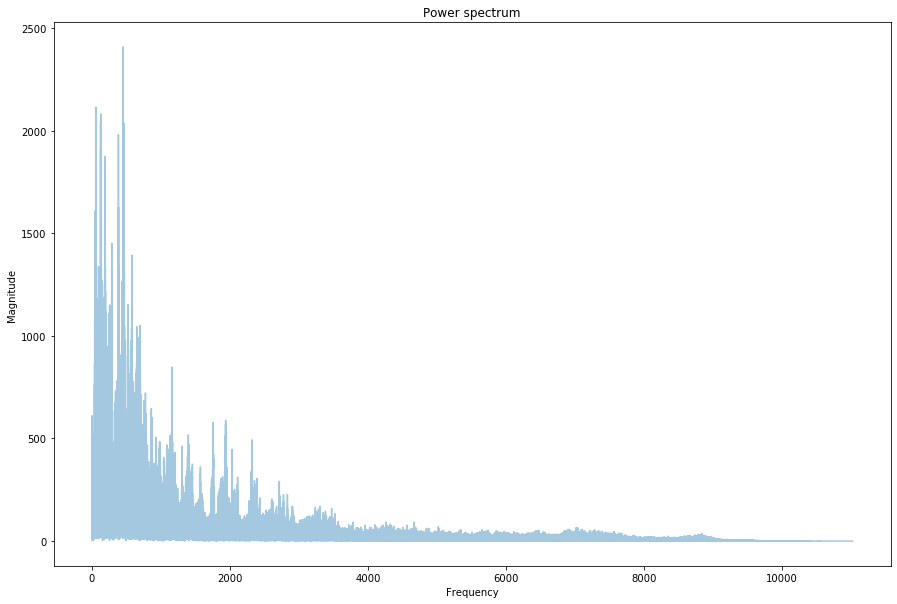

In [36]:
 # plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_frequency , left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [37]:
 # STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

In [38]:
 # perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [39]:
spectrogram = np.abs(stft)

In [45]:
 # apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

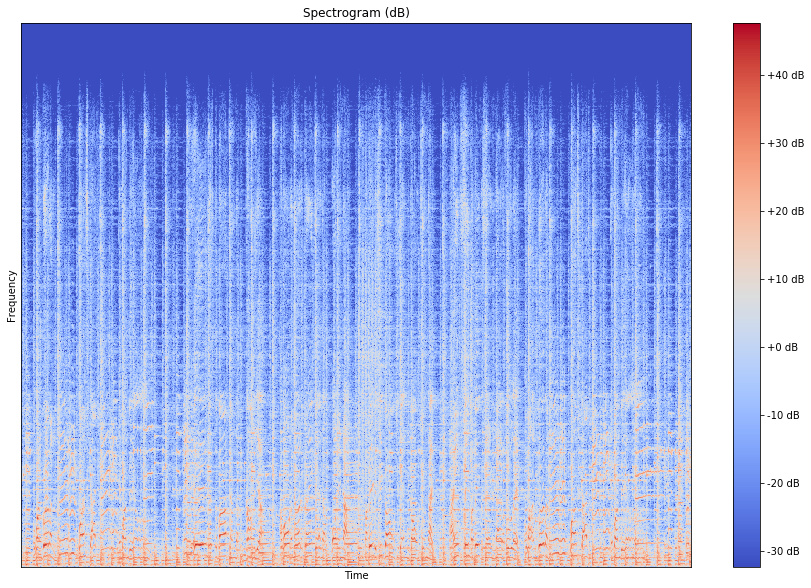

In [47]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")


In [49]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


Text(0.5, 1.0, 'MFCCs')

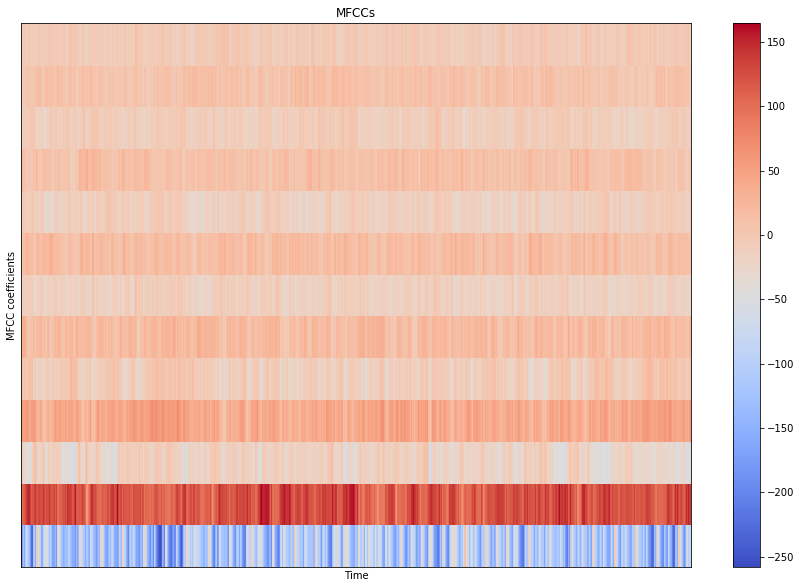

In [51]:
# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
